In [1]:
import sys
sys.path.insert(0, '../scripts/')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ruler.measures.cwl_rbp import RBPCWLMetric
from ruler.measures.cwl_inst import INSTCWLMetric
from ruler.measures.cwl_bpm import BPMDCWLMetric
from ruler.cwl_ruler import Ranking

In [2]:
g1 = [ 1,0,1,1,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]
t1 = Ranking("T1",g1,c1)

In [3]:
rbp = RBPCWLMetric(theta=0.9)
rbp.measure(t1)
rbp.report()

T1	RBP@0.9	0.3501	3.5009	1.0000	10.0000	10.0000


In [4]:
print(rbp.c_vector(t1)[0:10])

[ 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]


In [5]:
print(rbp.w_vector(t1)[0:10])

[ 0.1         0.09        0.081       0.0729      0.06561     0.059049
  0.0531441   0.04782969  0.04304672  0.03874205]


In [6]:
print(rbp.l_vector(t1)[0:10])

[ 0.1         0.09        0.081       0.0729      0.06561     0.059049
  0.0531441   0.04782969  0.04304672  0.03874205]


In [7]:
inst = INSTCWLMetric(T=1)
inst.measure(t1)
inst.report()

T1	INST-T=1	0.7934	1.1719	1.0000	1.4770	1.4771


In [8]:
print(inst.c_vector(t1)[0:10])

[ 0.25        0.44444444  0.44444444  0.44444444  0.5625      0.64        0.64
  0.69444444  0.69444444  0.73469388]


In [9]:
print(inst.w_vector(t1)[0:10])

[ 0.67700797  0.16925199  0.07522311  0.03343249  0.01485889  0.00835812
  0.0053492   0.00342349  0.00237742  0.00165099]


In [14]:
print(inst.l_vector(t1)[0:10])

[  7.50000000e-01   1.38888889e-01   6.17283951e-02   2.74348422e-02
   9.60219479e-03   4.44444444e-03   2.84444444e-03   1.54513032e-03
   1.07300716e-03   6.46989477e-04]


In [10]:
bpm = BPMDCWLMetric(T=3)
bpm.measure(t1)
bpm.report()

T1	BPM-Dynamic-T=3-K=10-hb=1.0-hc=1.0	0.5714	4.0000	1.0000	7.0000	7.0000


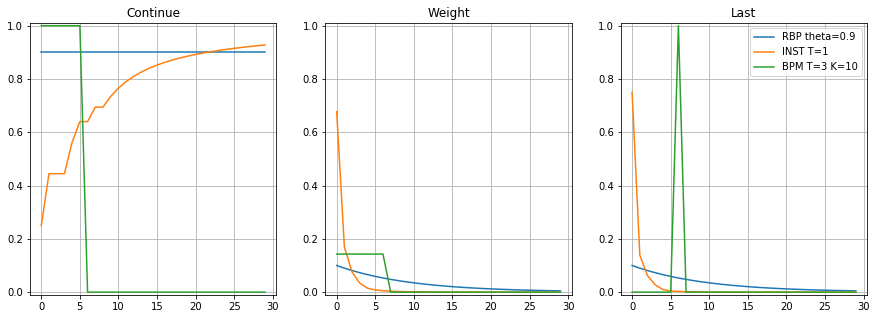

In [48]:
n=30
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.2)

ax = plt.subplot(131)
plt.title('Continue')
plt.plot(range(0,n),rbp.c_vector(t1)[0:n])
plt.plot(range(0,n),inst.c_vector(t1)[0:n])
plt.plot(range(0,n),bpm.c_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(132)
plt.title('Weight')
plt.plot(range(0,n),rbp.w_vector(t1)[0:n])
plt.plot(range(0,n),inst.w_vector(t1)[0:n])
plt.plot(range(0,n),bpm.w_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(133)
plt.title('Last')
plt.plot(range(0,n),rbp.l_vector(t1)[0:n])
plt.plot(range(0,n),inst.l_vector(t1)[0:n])
plt.plot(range(0,n),bpm.l_vector(t1)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)
plt.legend(['RBP theta=0.9','INST T=1','BPM T=3 K=10'])


In [39]:
g1 = [ 1,1,0,0,0,0,1,0,1,0]
c1 = [ 1,1,1,1,1,1,1,1,1,1]

t2 = Ranking("T2",g1,c1)

bpm38 = BPMDCWLMetric(T=3, K=8, hc=1.0, hb=1.0)
bpm33 = BPMDCWLMetric(T=5, K=4, hc=1.0, hb=1.0)
bpm38.measure(t2)
bpm33.measure(t2)

2.0

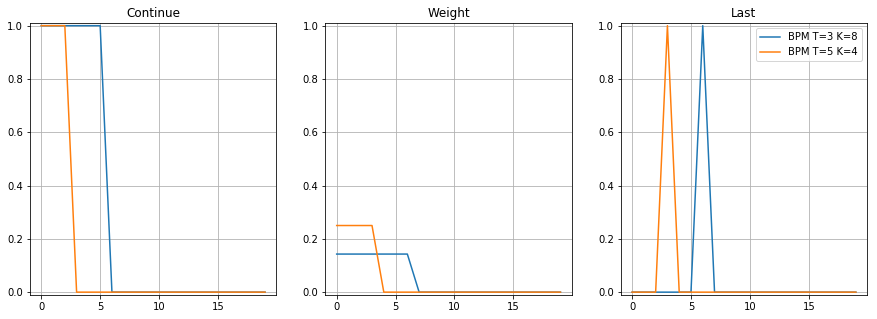

In [49]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.2)
ax = plt.subplot(131)
plt.title('Continue')
n=20
plt.plot(range(0,n),bpm38.c_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.c_vector(t2)[0:n])

plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(132)
plt.title('Weight')
plt.plot(range(0,n),bpm38.w_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.w_vector(t2)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)

ax = plt.subplot(133)
plt.title('Last')
plt.plot(range(0,n),bpm38.l_vector(t2)[0:n])
plt.plot(range(0,n),bpm33.l_vector(t2)[0:n])
plt.grid(True)
ax.set_ylim(ymin=-0.01, ymax=1.01)
plt.legend(['BPM T=3 K=8', 'BPM T=5 K=4'])